In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import cross_val_score

# Exploration du data set

In [ ]:

data = pd.read_csv('Credit.csv')
df = data.copy()
df.head()




,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,4,67,male,2,own,NaN,1169,6,radio/TV,good
1,2,22,female,2,own,little,5951,48,radio/TV,bad
2,4,49,male,1,own,little,2096,12,education,good
3,2,45,male,2,free,little,7882,42,furniture/equipment,good
4,3,53,male,2,free,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,2,31,female,1,own,little,1736,12,furniture/equipment,good
996,2,40,male,3,own,little,3857,30,car,good
997,2,38,male,2,own,little,804,12,radio/TV,good
998,2,23,male,2,free,little,1845,45,radio/TV,bad


In [1086]:
print(df)

     Credit History  Age  Gender  Job Housing Saving accounts  Credit amount  \
0                 4   67    male    2     own             NaN           1169   
1                 2   22  female    2     own          little           5951   
2                 4   49    male    1     own          little           2096   
3                 2   45    male    2    free          little           7882   
4                 3   53    male    2    free          little           4870   
..              ...  ...     ...  ...     ...             ...            ...   
995               2   31  female    1     own          little           1736   
996               2   40    male    3     own          little           3857   
997               2   38    male    2     own          little            804   
998               2   23    male    2    free          little           1845   
999               4   27    male    2     own        moderate           4576   

     Duration              Purpose  Ris

In [121]:
df.shape

(1000, 10)

In [123]:
df.dtypes

Credit History      int64
Age                 int64
Gender             object
Job                 int64
Housing            object
Saving accounts    object
Credit amount       int64
Duration            int64
Purpose            object
Risk               object
dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Credit History   1000 non-null   int64 
 1   Age              1000 non-null   int64 
 2   Gender           1000 non-null   object
 3   Job              1000 non-null   int64 
 4   Housing          1000 non-null   object
 5   Saving accounts  817 non-null    object
 6   Credit amount    1000 non-null   int64 
 7   Duration         1000 non-null   int64 
 8   Purpose          1000 non-null   object
 9   Risk             1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [59]:
df.describe()

,Credit History,Age,Job,Credit amount,Duration
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.54500,35.546000,1.904000,3271.258000,20.903000
std,1.08312,11.375469,0.653614,2822.736876,12.058814
min,0.00000,19.000000,0.000000,250.000000,4.000000
25%,2.00000,27.000000,2.000000,1365.500000,12.000000
50%,2.00000,33.000000,2.000000,2319.500000,18.000000
75%,4.00000,42.000000,2.000000,3972.250000,24.000000
max,4.00000,75.000000,3.000000,18424.000000,72.000000


In [345]:

df['Purpose'].unique()


array([5, 3, 4, 1, 0, 2, 6, 7])

#### 5 variables qualitatives/10

# Analyse des valeurs manquantes

<Axes: >

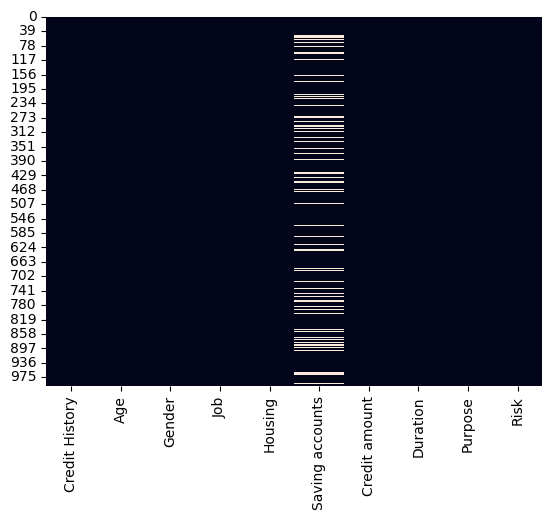

In [65]:
sns.heatmap(df.isna(), cbar = False)

#### On observe plusieurs bandes blanches (Valeurs manquantes) au niveau de Saving accounts

#### Observons la quantité

In [67]:
df.isna().sum()

Credit History       0
Age                  0
Gender               0
Job                  0
Housing              0
Saving accounts    183
Credit amount        0
Duration             0
Purpose              0
Risk                 0
dtype: int64

#### On a 183 valeurs manquantes c'est-à-dire 18,3% au niveau de Saving accounts . Ce n'est pas assez pour supprimer toute la colonne . Mais c'est un peu trop pour supprimer les lignes concernées 

In [69]:
print(df['Saving accounts'].unique())

[nan 'little' 'quite rich' 'rich' 'moderate']


#### Il s'agit d'une variable categorielle qui ne prend que 04 valeurs quand elle en a

In [71]:
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode()[0])

In [73]:
df.isna().sum()

Credit History     0
Age                0
Gender             0
Job                0
Housing            0
Saving accounts    0
Credit amount      0
Duration           0
Purpose            0
Risk               0
dtype: int64

#### On n'a donc plus aucune valeur manquante 

# Variables

## Target Variable

In [75]:
print(df['Risk'].unique()) # Il s'agit d'une variable binaire

['good' 'bad']


In [65]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

<Axes: title={'center': 'Répartition du risque'}, ylabel='proportion'>

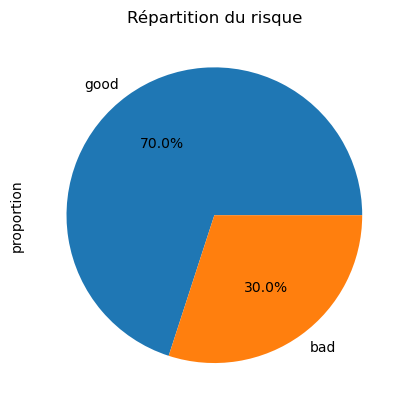

In [67]:
df['Risk'].value_counts(normalize = True).plot.pie(autopct= '%1.1f%%',title='Répartition du risque')

## Variables quantitatives

###### D'après ce qui précede , on avait que des entiers

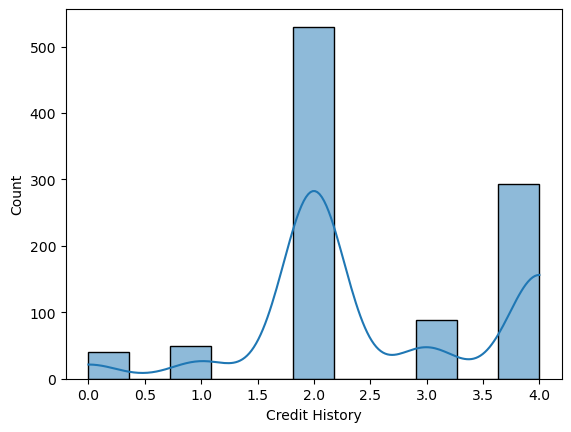

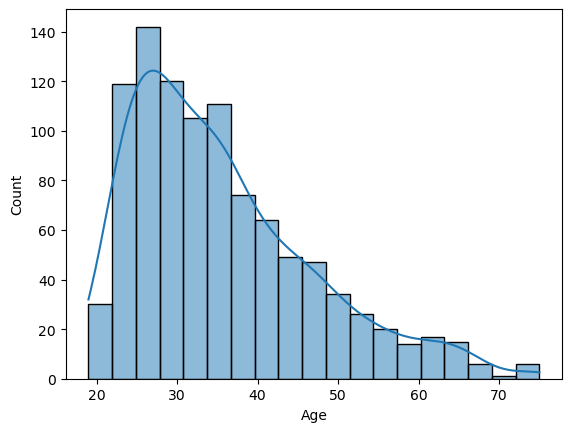

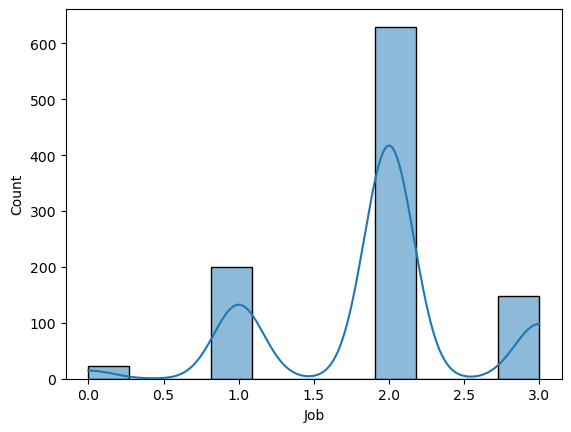

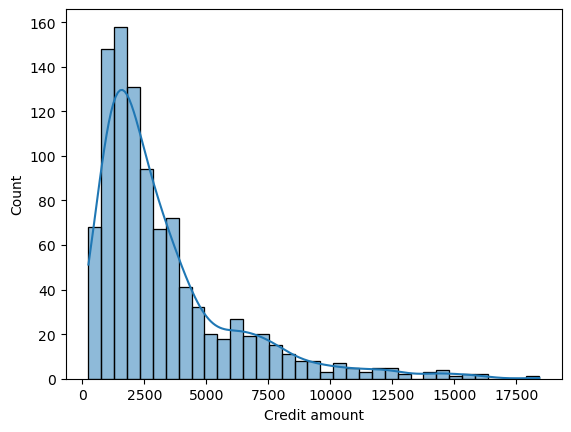

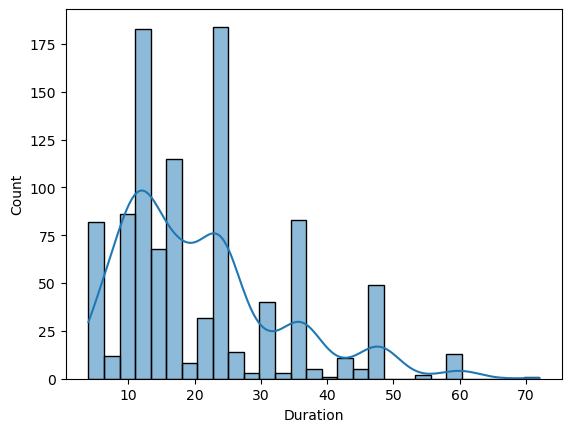

In [27]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.histplot(df[col] , kde = True)
 

## Variables qualitatives

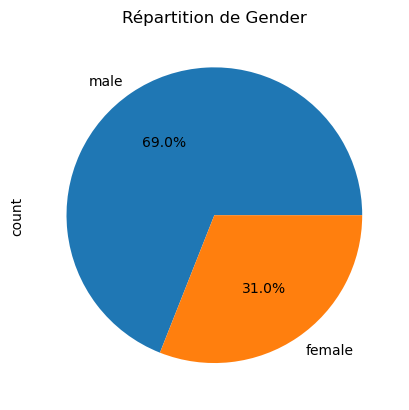

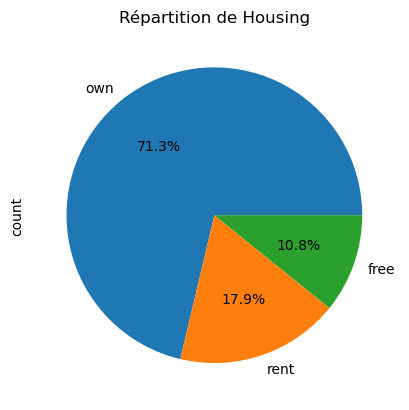

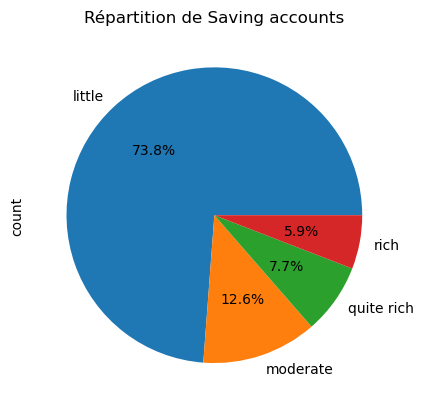

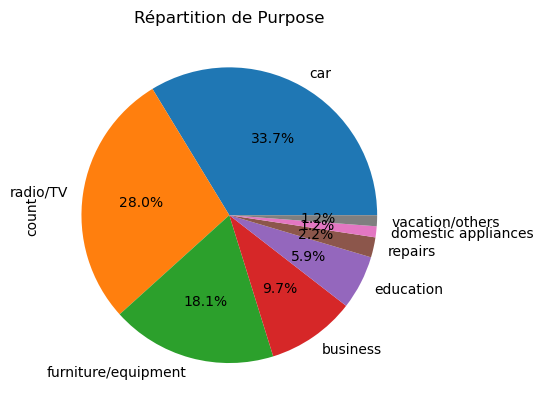

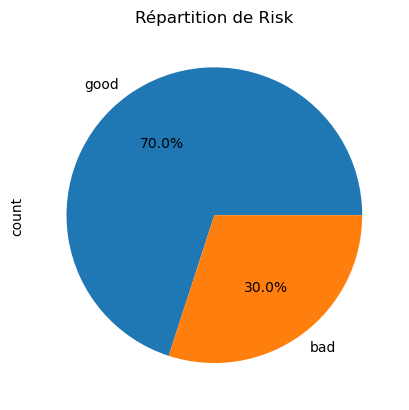

In [29]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie(autopct= '%1.1f%%',title='Répartition de ' + col)
    # OU
    #plt.figure()
    #sns.countplot(data=df, x=col)
    #plt.title(f"Répartition de {col}")
    #plt.xticks(rotation=45)
    #plt.tight_layout()
   # plt.show()#

# Relation variables /Target

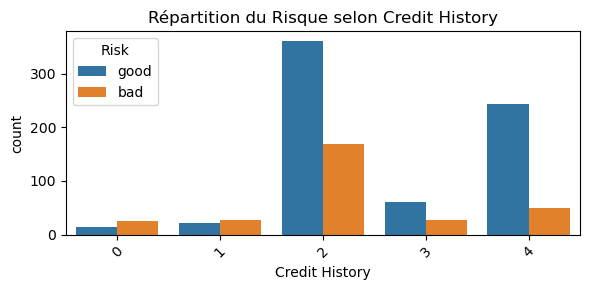

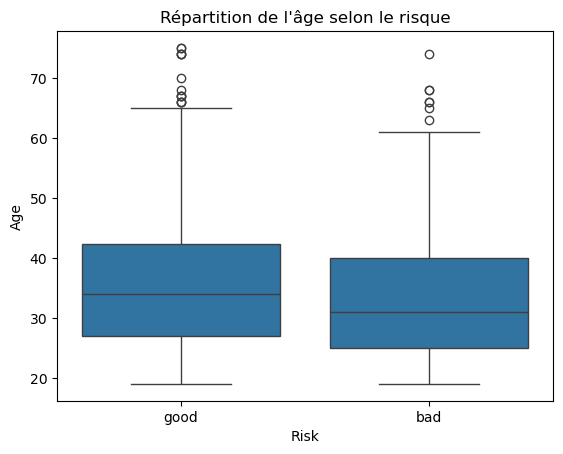

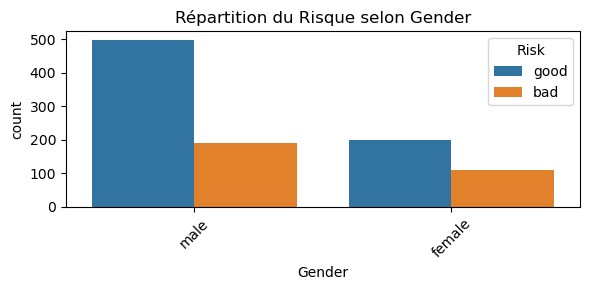

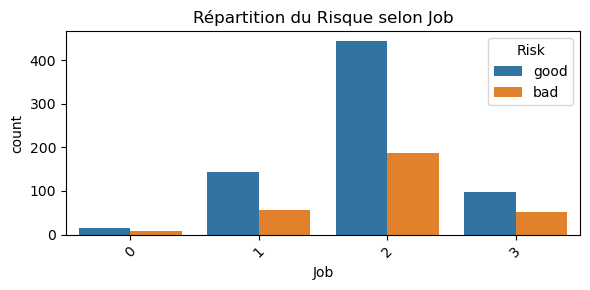

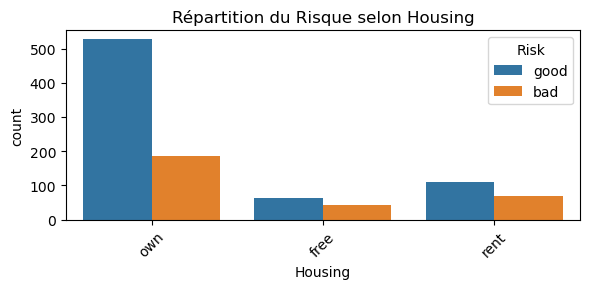

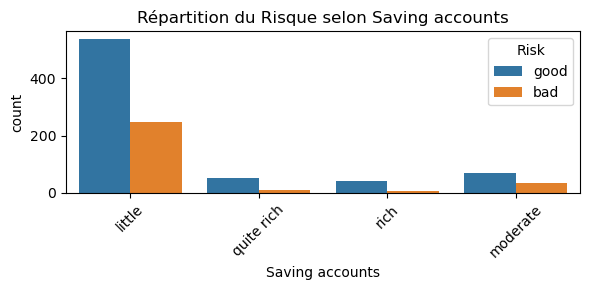

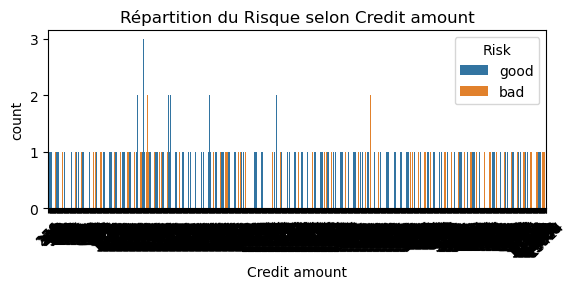

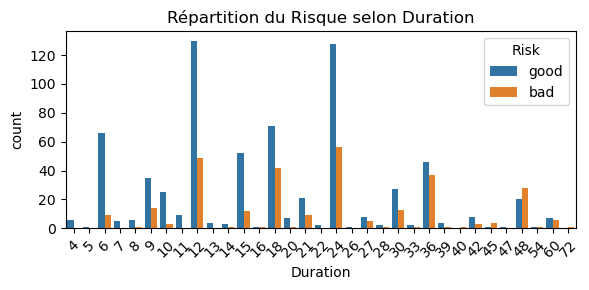

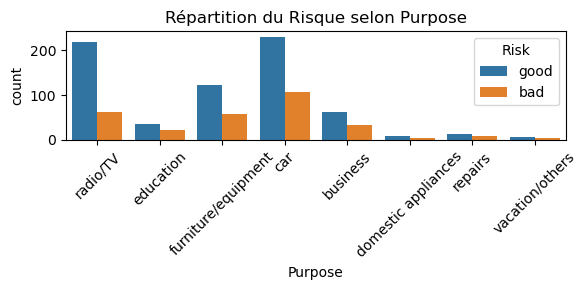

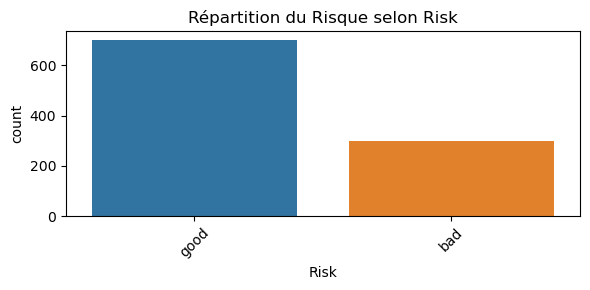

In [69]:

for col in df.columns:
  if col !='Age' :# Car âge a trop de valeurs pour un diagramme à bandes
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue='Risk', data=df)
    plt.title(f"Répartition du Risque selon {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
  else :  
    sns.boxplot(x='Risk', y='Age', data=df) # C'est mieux de le représenter avec un boxplot
    plt.title("Répartition de l'âge selon le risque")
    plt.show()


# Correlation entre les variables numériques

Text(0.5, 1.0, 'Corrélations entre variables numériques')

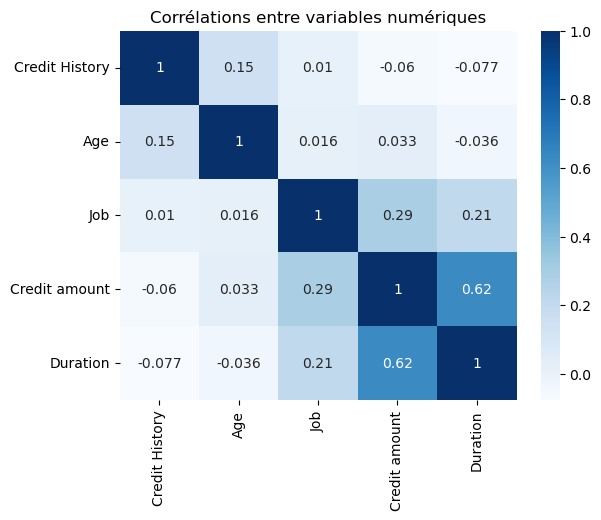

In [125]:
num_cols = df.select_dtypes('int').columns
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues")
plt.title("Corrélations entre variables numériques")

## Encodage des colonnes catégorielles

In [1088]:
df # On a ceci initialement

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,4,67,male,2,own,NaN,1169,6,radio/TV,good
1,2,22,female,2,own,little,5951,48,radio/TV,bad
2,4,49,male,1,own,little,2096,12,education,good
3,2,45,male,2,free,little,7882,42,furniture/equipment,good
4,3,53,male,2,free,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,2,31,female,1,own,little,1736,12,furniture/equipment,good
996,2,40,male,3,own,little,3857,30,car,good
997,2,38,male,2,own,little,804,12,radio/TV,good
998,2,23,male,2,free,little,1845,45,radio/TV,bad


In [1090]:
# Encodage des colonnes catégoriellles (Elles sont toutes de types "object" d'apres ce qui précède)
var_cat = df.select_dtypes('object').columns# Je place sous forme de liste l'ensemble des colonnes catégorielles de df(en sélectionnant le type "object" 


In [1092]:
var_cat

Index(['Gender', 'Housing', 'Saving accounts', 'Purpose', 'Risk'], dtype='object')

In [1094]:
df_encode = pd.get_dummies(df,columns= var_cat, dtype= int,drop_first= True )

df_encode

,Credit History,Age,Job,Credit amount,Duration,Gender_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,4,67,2,1169,6,1,1,0,0,0,0,0,0,0,0,1,0,0,1
1,2,22,2,5951,48,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,4,49,1,2096,12,1,1,0,0,0,0,0,0,1,0,0,0,0,1
3,2,45,2,7882,42,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,3,53,2,4870,24,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,31,1,1736,12,0,1,0,0,0,0,0,0,0,1,0,0,0,1
996,2,40,3,3857,30,1,1,0,0,0,0,1,0,0,0,0,0,0,1
997,2,38,2,804,12,1,1,0,0,0,0,0,0,0,0,1,0,0,1
998,2,23,2,1845,45,1,0,0,0,0,0,0,0,0,0,1,0,0,0


## Séparation données et cible

In [1096]:

X = df_encode.drop(["Risk_good"], axis=1)# Données
y= df_encode['Risk_good']# Cible


In [1098]:
X

,Credit History,Age,Job,Credit amount,Duration,Gender_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,4,67,2,1169,6,1,1,0,0,0,0,0,0,0,0,1,0,0
1,2,22,2,5951,48,0,1,0,0,0,0,0,0,0,0,1,0,0
2,4,49,1,2096,12,1,1,0,0,0,0,0,0,1,0,0,0,0
3,2,45,2,7882,42,1,0,0,0,0,0,0,0,0,1,0,0,0
4,3,53,2,4870,24,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,31,1,1736,12,0,1,0,0,0,0,0,0,0,1,0,0,0
996,2,40,3,3857,30,1,1,0,0,0,0,1,0,0,0,0,0,0
997,2,38,2,804,12,1,1,0,0,0,0,0,0,0,0,1,0,0
998,2,23,2,1845,45,1,0,0,0,0,0,0,0,0,0,1,0,0


In [1006]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk_good, Length: 1000, dtype: int32

## Standardiser les données (important pour la convergence)

In [ ]:
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

In [ ]:
# Séparer train et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify= y)

In [ ]:

# Régression logistique avec plus d'itérations
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# Prédictions et précision
y_pred = model.predict(X_test)
print("Précision :", accuracy_score(y_test, y_pred))


Précision : 0.7


In [ ]:
y_test

977    1
735    1
615    1
413    1
563    0
      ..
138    1
442    1
153    1
325    1
738    1
Name: Risk_good, Length: 200, dtype: int32

In [ ]:
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### Cette précision est basse et moins fiable . car elle est basée sur une evaluation unique. Il se pourrait que le resultat soit très dépendant du split choisi  

# Utilisons le Cross validation pour un resultat plus fiable refletant des performances plus réelles

In [1110]:
model = LogisticRegression(class_weight='balanced',max_iter=10000)
scores = cross_val_score(model, X, y, scoring='precision', cv=10)

scores

array([0.81034483, 0.80327869, 0.75      , 0.81818182, 0.79661017,
       0.82758621, 0.73684211, 0.86792453, 0.82142857, 0.80769231])

In [1020]:
new_precision = scores.mean()
print("Précision moyenne :",new_precision *100,"%")# On multiplie par 100 pour obtenir le pourcentage

Précision moyenne : 80.39889223366616 %


# Conclusion: On a une precision moyenne d'environ $80,4\% $ sur 10 evaluations 

In [1122]:
pickle.dump(model,open('risk_prediction.pkl','wb'))